In [2]:
import os
from os import listdir
from os.path import isfile, join
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import scipy.stats as stats

In [3]:
def create_csv(path, class2=False):
    files = [f for f in listdir(path) if isfile(join(path, f))]
    images = [int(st.split(".")[0]) for st in files]
    df_images = pd.DataFrame(images, columns=["image"])
    AVA = pd.read_csv("datasets/AVA_full.csv")
    data = AVA.merge(df_images, on=["image"])
    if class2:
        mu = np.mean(data["mean"])
        data["2class"] = data.apply(lambda row: (row["mean"] > mu) * 1, axis=1)
    return data

5.3833261234316145 0.5347894574383183


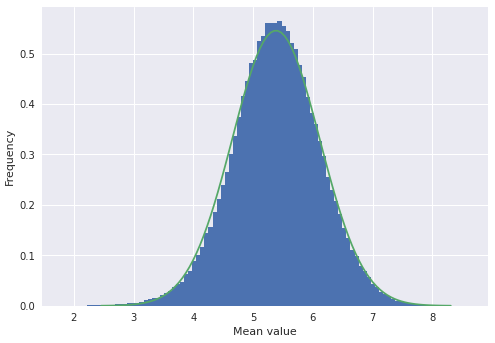

In [16]:
AVA = pd.read_csv("datasets/AVA_full.csv")
mu = np.mean(AVA["mean"])
sigma = np.std(AVA["mean"])


with plt.style.context('seaborn'):
    x = np.linspace(mu - 4 * sigma, mu + 4 * sigma, 100)
    freq, bins, patches = plt.hist(AVA["mean"], bins=100, density=True)
    plt.plot(x, stats.norm.pdf(x, mu, sigma))
    plt.xlabel("Mean value")
    plt.ylabel("Frequency")
    plt.savefig("plots/data_full.png")
print(mu, sigma**2)

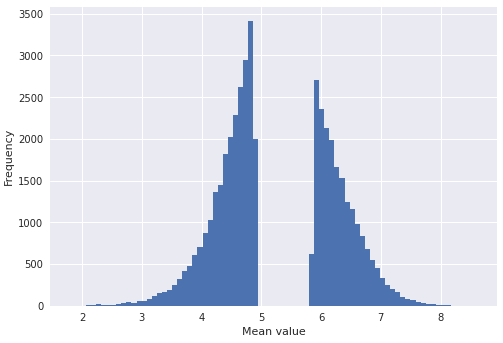

In [17]:
mypath = "dataset_class"
data_class = create_csv(mypath, class2=True)
data_class.to_csv("datasets/data_class.csv")
with plt.style.context('seaborn'):
    freq, bins, patches = plt.hist(data_class["mean"], bins=80)
    plt.xlabel("Mean value")
    plt.ylabel("Frequency")
    plt.savefig("plots/data_class.png")

In [6]:
print("Antal billeder i alt", len(data_class))
print("Antal billeder i klasse 1:", len(data_class.loc[data_class["2class"] == 1]))
print("Antal billeder i klasse 0:", len(data_class.loc[data_class["2class"] == 0]))

Antal billeder i alt 45909
Antal billeder i klasse 1: 20250
Antal billeder i klasse 0: 25659


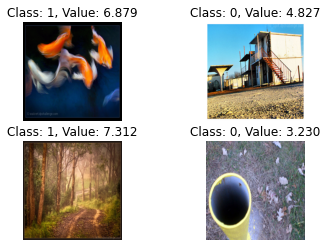

In [11]:
imgid = ["871605", "633835", "953816", "633532"]

from PIL import Image

a = np.asarray(img)
fig, axs = plt.subplots(2, 2)
axs = axs.ravel()
for i, iid in enumerate(imgid):
    path = f"dataset_class/{iid}.jpg"
    img = Image.open(path)
    img = img.resize((224,224))
    img = np.asarray(img)
    row = data_class.loc[data_class["image"] == int(iid)]
    axs[i].imshow(img)
    axs[i].axis("off")
    axs[i].set_title(f"Class: {row['2class'].item()}, Value: {row['mean'].item():.3f}")
fig.savefig("plots/data_example.png")